## Load Dataset and Imports

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

#drive.mount('/content/drive/')


 #Imports
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import math
import statistics
from warnings import filterwarnings
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
filterwarnings('ignore')


from numpy.random import seed
from numpy.random import randn

#import warnings 
#warnings.filterwarnings('ignore')

Mounted at /content/drive/


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#cross validation number
cv = 10

#compare models
ADJ_R2 = dict()

In [ ]:
path1 = "training_data.csv"
path2 = "real_test_data.csv"
#path1 = "/content/drive/MyDrive/Data/datasets/biological-age/training_data.csv"
#path2 = "/content/drive/MyDrive/Data/datasets/biological-age/real_test_data.csv"

df_train = pd.read_csv(path1)
df_test = pd.read_csv(path2)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(299, 13)
(200, 12)


In [ ]:
df_train.describe()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000
mean,149.000000,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870
std,86.458082,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208
min,0.000000,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000
25%,74.500000,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000
50%,149.000000,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000
75%,223.500000,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000
max,298.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000


In [ ]:
df_test.describe()


,Unnamed: 0,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,0.485000,639.950000,0.430000,38.10000,0.340000,283891.130600,1.306800,137.435000,0.620000,0.290000,122.705000
std,57.879185,0.501029,799.774263,0.496318,11.76572,0.474898,121374.400068,0.997763,4.020772,0.486604,0.454901,77.673637
min,0.000000,0.000000,24.000000,0.000000,14.00000,0.000000,85020.040000,0.540000,122.000000,0.000000,0.000000,4.000000
25%,49.750000,0.000000,101.000000,0.000000,30.00000,0.000000,214275.055000,0.850000,136.000000,0.000000,0.000000,63.500000
50%,99.500000,0.000000,367.500000,0.000000,37.00000,0.000000,262326.350000,1.090000,137.000000,1.000000,0.000000,106.000000
75%,149.250000,1.000000,872.750000,1.000000,45.00000,1.000000,321847.190000,1.320000,139.250000,1.000000,1.000000,188.000000
max,199.000000,1.000000,5134.000000,1.000000,80.00000,1.000000,850000.000000,9.330000,148.000000,1.000000,1.000000,284.000000


In [ ]:
df_train.columns

Index(['Unnamed: 0', 'age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [ ]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_train.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

There is no missing data

## Plots

### Correlaton Plot

In [ ]:
df = pd.concat([df_train, df_test])

                               age   anaemia  ...   smoking      time
age                       1.000000  0.088006  ...  0.018668 -0.224068
anaemia                   0.088006  1.000000  ... -0.119817 -0.154067
creatinine_phosphokinase -0.081584 -0.205413  ...  0.035421  0.003008
diabetes                 -0.101012  0.028009  ... -0.132768  0.037023
ejection_fraction         0.060098  0.048385  ... -0.045244  0.085576
high_blood_pressure       0.093289  0.090068  ... -0.049142 -0.169866
platelets                -0.052354 -0.036552  ... -0.050013  0.038627
serum_creatinine          0.159187  0.059989  ... -0.036505 -0.142456
serum_sodium             -0.045966  0.028590  ...  0.019016  0.118055
sex                       0.065430 -0.075564  ...  0.386747  0.009461
smoking                   0.018668 -0.119817  ...  1.000000 -0.036007
time                     -0.224068 -0.154067  ... -0.036007  1.000000

[12 rows x 12 columns]


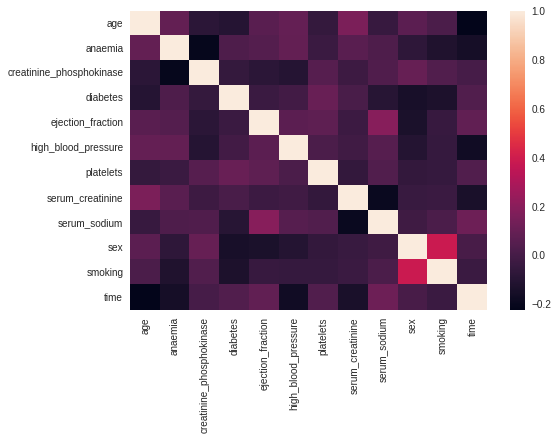

In [ ]:

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(df.corr())
  
# displaying heatmap
mp.show()

Observation: We see that there is positive correlcation between ejection_fraction and serum_sodium, and between high_blood_pressure and anaemia
The strongest correlation (but negative) is between time and age. Considering that time is defined as
TIME: Follow-up period (days) between anemia measures
We conclude that the period is the most influential variable among all though the correlation number is only 0.224068


### Interactive Scatterplot

In [ ]:
import plotly.express as px
fig = px.scatter(df_train, x="platelets", y="age", color="sex")
fig.show()

In [ ]:
df_train.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
# Pair-wise Scatter Plots
#cols = ['platelets','serum_sodium', 'age']
#pp = sns.pairplot(df_train, hue="sex")

#fig = pp.fig n_neighbors
#fig.savefig('temp.png')

### Violinplot

In [ ]:
columns = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]

In [ ]:
len(columns)

6

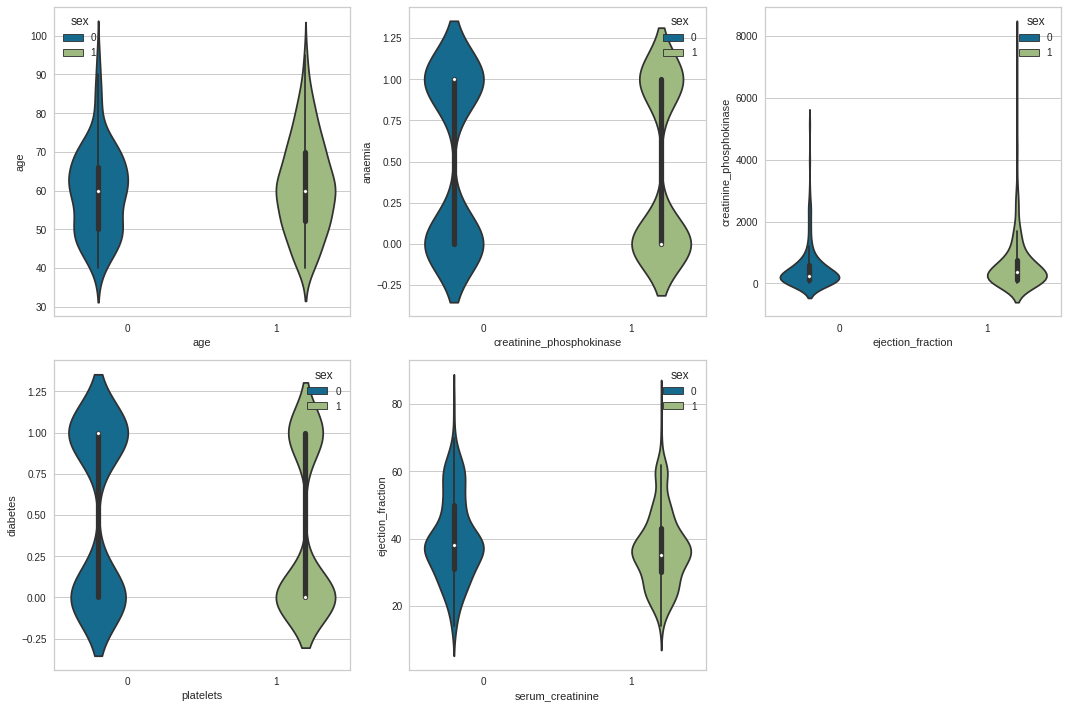

In [ ]:
n = len(columns)


fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, int(n/2))


position = 0
for i in range(n-1):
  if i < 3:
    row = 0
  else:
    row = 1
  ax = fig.add_subplot(gs[row, i%3])
  sns.violinplot(x="sex", y=df.iloc[:,i], hue="sex", data=df)
  ax.set_xlabel(columns[i])

fig.tight_layout()
plt.show()

 ## Regression Models

#### Normalize

In [ ]:
##NEW###

#first separate features and target
y = df_train['age'].values.reshape(-1,1)
X = df_train.loc[:,df_train.columns != 'age'].values



#Split
#Although we have a train and test data, since we don't have labels for the test data, in order to
#evaluate the model, we split the train data again into new train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30)



transformer_x = MinMaxScaler().fit(X_train)
transformer_y = MinMaxScaler().fit(y_train) 

X_train = transformer_x.transform(X_train)
y_train = transformer_y.transform(y_train)
X_test = transformer_x.transform(X_test)
y_test = transformer_y.transform(y_test)

X_t = df_test.values
# X = df_train.loc[:, df_train.columns != 'age'].values
# y = df_train['age'].values.reshape(-1,1)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(209, 11)
(209, 1)


#### SVR

In [ ]:


# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
#kernel_label = ["RBF", "Linear", "Polynomial"]
#model_color = ["m", "c", "g"]

svr = svrs[0]
svr.fit(X_train, y_train)
y_tr_pr = svr.predict(X_train).reshape(-1,1)
y_pred = svr.predict(X_test)

##### Hyperparameter Tuning with Cross Validation

###### Gridsearch

GridSearch was computationally costly so I sufficed to RandomSearch
But I kept the syntax for the SVR

In [ ]:

 
# defining parameter range
#param_grid = {'C': [0.1, 1, 10, 100, 1000],
#              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#              'kernel': ['rbf', 'poly']}
#grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
#grid.fit(X_train, y_train)

In [ ]:
# print best parameter after tuning
#print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
#print(grid.best_estimator_)

###### Randomsearch

In [ ]:
# define search space
space = dict()
space['C'] = [0.1, 1, 10, 100, 1000]
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]
space['kernel'] = ['rbf', 'poly', 'linear']


search = RandomizedSearchCV(SVR(), space, cv=cv)
 


# execute search
result = search.fit(X_train, y_train)


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.046305357834902236
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}


In [ ]:
params = result.best_params_

svr_best = SVR(kernel = params['kernel'],
               C = params['C'],
               gamma = params['gamma'])

In [ ]:
svr_best.fit(X_train, y_train)
y_tr_pr = svr_best.predict(X_train).reshape(-1,1)
y_pred = svr_best.predict(X_test)

##### Visualize Error

Evaluate the model on both training and test data

0
1


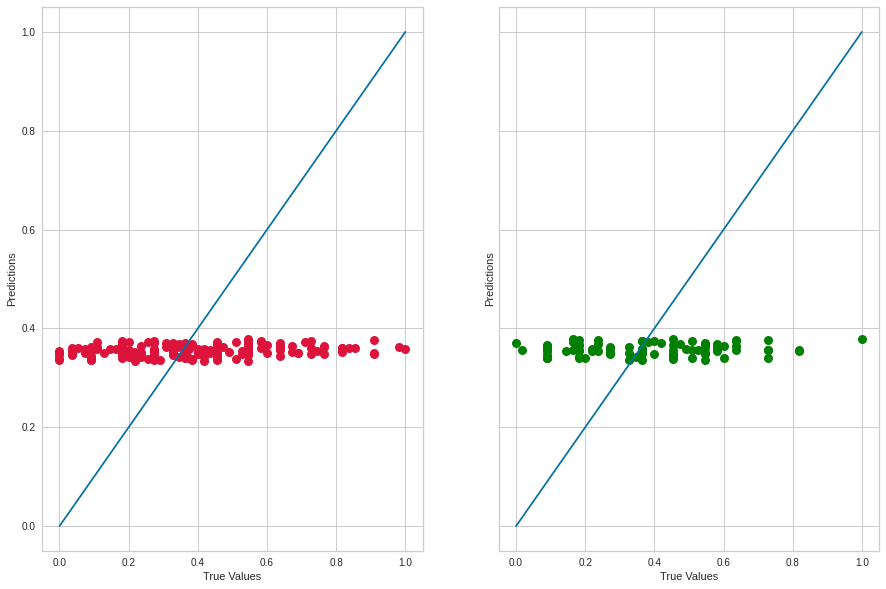

In [ ]:
labels = ['train evaluation', 'test evaluation']
colors = ['crimson', 'green']
data = [[y_train, y_tr_pr], [y_test, y_pred]]
lw = 2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True,sharey=True)
for ix, temp in enumerate(labels):
    print(ix)
    axes[ix].scatter(
    data[ix][0], data[ix][1],
    color=colors[ix],
    lw=lw,
    label="{} model".format(labels[ix]),
    )
    axes[ix].set_xlabel('True Values')
    axes[ix].set_ylabel('Predictions')



    p1 = max(max(data[ix][0]), max(data[ix][1]))
    p2 = min(min(data[ix][0]), min(data[ix][1]))    
    axes[ix].plot([p1, p2], [p1, p2], 
                  'b-',
                  label ="{} model".format(labels[ix]))
    #plt.axis('equal')


Compare evaluation of test with the best fit

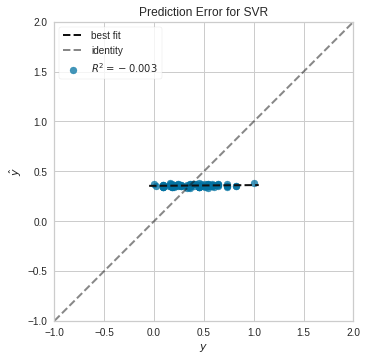

In [ ]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(svr_best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [ ]:
r2_score(y_test, y_pred)

-0.0032430066979758365

In [ ]:
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
scores  

array([-1.92182924, -0.35996698, -0.46004064, -0.16465535, -0.63048151])

In [ ]:
y_tr_pr.shape

(209, 1)

##### Adjusted $R^2$

In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
print(n,p)

90 11


In [ ]:
#display adjusted R-squared

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1- ((1-r2) * ((n-1) / (n-p-1)))

ADJ_R2['SVM'] = adj_r2 

#### KNN 

##### Hyperparameter Tuning

###### Randomsearch

In [ ]:
# define search space
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform','distance']
#Convert to dictionary
space = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights = weights)





# defining parameter range
search = RandomizedSearchCV(KNeighborsRegressor(), space, cv=cv)
 


# execute search
result = search.fit(X_train, y_train)


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.060415666906686614
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 15, 'leaf_size': 23}


In [ ]:
params = result.best_params_

knn_best = KNeighborsRegressor(n_neighbors = params['n_neighbors'],
                                leaf_size  = params['leaf_size'],
                                p = params['p'],
                                weights = params['weights']
                                )

In [ ]:
knn_best.fit(X_train, y_train)
y_tr_pr = knn_best.predict(X_train)
y_pred = knn_best.predict(X_test)


##### Visualize Error

Evaluate the model on both training and test data

0
1


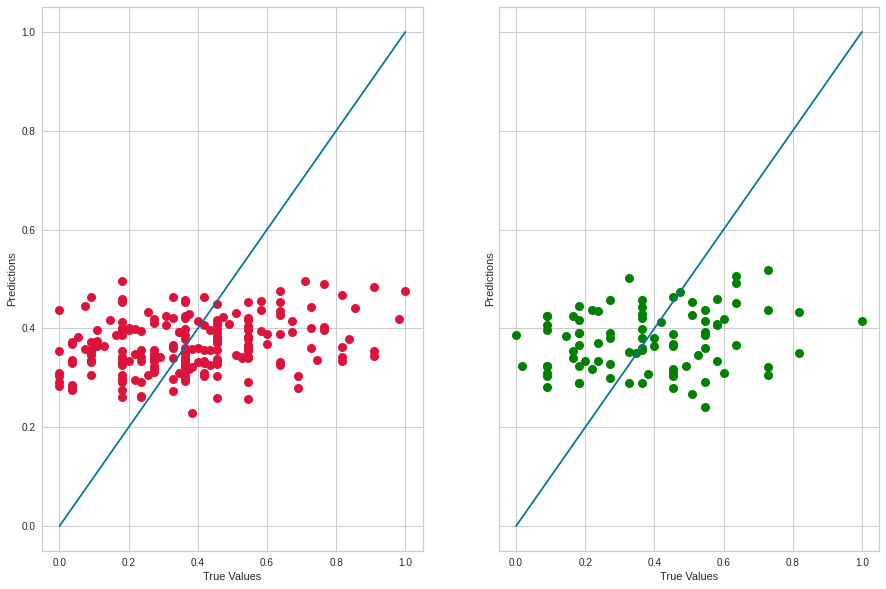

In [ ]:
labels = ['train evaluation', 'test evaluation']
colors = ['crimson', 'green']
data = [[y_train, y_tr_pr], [y_test, y_pred]]
lw = 2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True,sharey=True)
for ix, temp in enumerate(labels):
    print(ix)
    axes[ix].scatter(
    data[ix][0], data[ix][1],
    color=colors[ix],
    lw=lw,
    label="{} model".format(labels[ix]),
    )
    axes[ix].set_xlabel('True Values')
    axes[ix].set_ylabel('Predictions')



    p1 = max(max(data[ix][0]), max(data[ix][1]))
    p2 = min(min(data[ix][0]), min(data[ix][1]))    
    axes[ix].plot([p1, p2], [p1, p2], 
                  'b-',
                  label ="{} model".format(labels[ix]))
    #plt.axis('equal')


Compare evaluation of test with the best fit

In [ ]:
# Instantiate the linear model and visualizer
#visualizer = PredictionError(knn_best)

#visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
#visualizer.show()  

In [ ]:
r2_score(y_test, y_pred)

0.02389130044492027

In [ ]:
y_tr_pr.shape

(209, 1)

##### Adjusted $R^2$

In [ ]:
#display adjusted R-squared

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1- ((1-r2) * ((n-1) / (n-p-1)))

ADJ_R2['KNN'] = adj_r2 

#### Decision Tree

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_tr_pr = regressor.predict(X_train)
y_pred = regressor.predict(X_test)
#y_pred_new = regressor.predict(X_t)
compare = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})



In [ ]:
compare

,Real Values,Predicted Values
0,0.454545,0.272727
1,0.090909,0.090909
2,0.400000,0.854545
3,0.418182,0.309091
4,0.363636,0.909091
...,...,...
85,0.818182,0.363636
86,0.400000,0.363636
87,0.345455,0.327273
88,0.181818,0.200000


##### Hyperparameter Tuning

###### Randomsearch

In [ ]:
# define search space
space = dict()
space['max_depth'] = [1,3,5,7,9,11,12]
space['min_samples_leaf'] = [1,2,3,4,5,6,7,8,9,10]
space['min_weight_fraction_leaf'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
space['max_features'] = ["auto","log2","sqrt",None]
space['max_leaf_nodes'] = [None,10,20,30,40,50,60,70,80,90]




# defining parameter range
search = RandomizedSearchCV(DecisionTreeRegressor(), space, cv=cv)
 


# execute search
result = search.fit(X_train, y_train)


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -0.04253016253239504
Best Hyperparameters: {'min_weight_fraction_leaf': 0.4, 'min_samples_leaf': 2, 'max_leaf_nodes': 70, 'max_features': 'log2', 'max_depth': 5}


In [ ]:
params = result.best_params_

dt_best = DecisionTreeRegressor(max_depth = params['max_depth'],
                                min_samples_leaf = params['min_samples_leaf'],
                                max_leaf_nodes = params['max_leaf_nodes'],
                                min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                                max_features = params['max_features']
                                )

In [ ]:
dt_best.fit(X_train, y_train)
y_tr_pr = dt_best.predict(X_train).reshape(-1,1)
y_pred = dt_best.predict(X_test)

##### Visualize Error

Evaluate the model on both training and test data

0
1


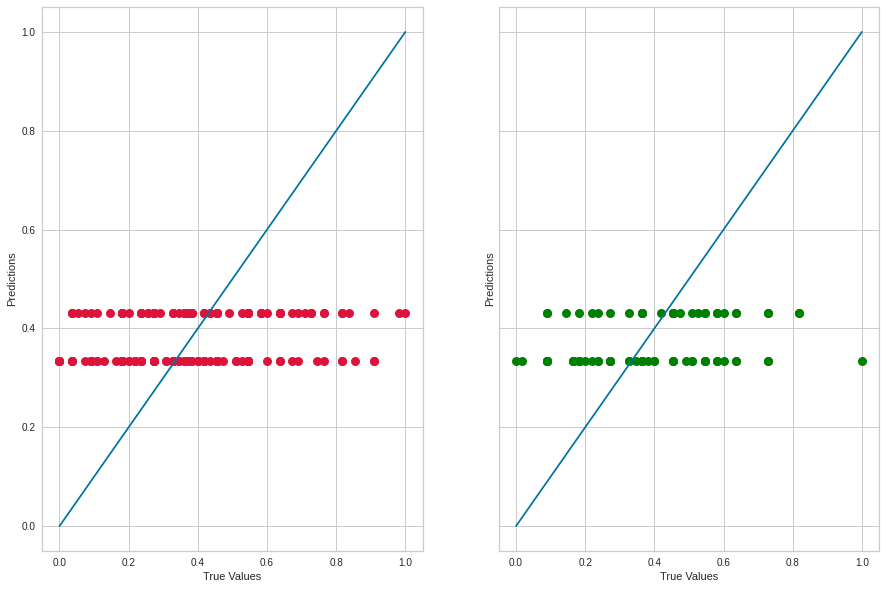

In [ ]:
labels = ['train evaluation', 'test evaluation']
colors = ['crimson', 'green']
data = [[y_train, y_tr_pr], [y_test, y_pred]]
lw = 2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True,sharey=True)
for ix, temp in enumerate(labels):
    print(ix)
    axes[ix].scatter(
    data[ix][0], data[ix][1],
    color=colors[ix],
    lw=lw,
    label="{} model".format(labels[ix]),
    )
    axes[ix].set_xlabel('True Values')
    axes[ix].set_ylabel('Predictions')



    p1 = max(max(data[ix][0]), max(data[ix][1]))
    p2 = min(min(data[ix][0]), min(data[ix][1]))    
    axes[ix].plot([p1, p2], [p1, p2], 
                  'b-',
                  label ="{} model".format(labels[ix]))
    #plt.axis('equal')


Compare evaluation of test with the best fit

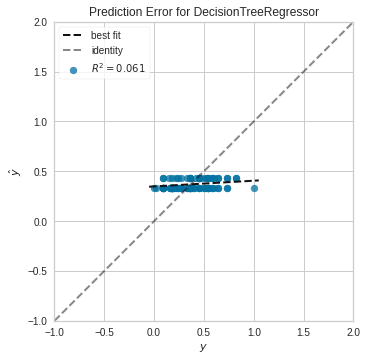

In [ ]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(dt_best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [ ]:
r2_score(y_test, y_pred)

0.060638736340203225

In [ ]:
scores = cross_val_score(svr, X_train, y_train, scoring='r2', cv=5)
scores  

array([-1.92182924, -0.35996698, -0.46004064, -0.16465535, -0.63048151])

In [ ]:
y_tr_pr.shape

(209, 1)

##### Adjusted $R^2$

In [ ]:
#display adjusted R-squared

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1- ((1-r2) * ((n-1) / (n-p-1)))

ADJ_R2['Decision Tree'] = adj_r2 

#### Random Forest

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
y_tr_pr = regr.predict(X_train)
y_pred = regr.predict(X_test)
#y_pred_new = regr.predict(X_t)
compare = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})



##### Hyperparameter Tuning

###### Randomsearch

In [ ]:
# define search space
space = dict()
# Number of trees in random forest
space['n_estimators'] = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
space['max_features'] =  ['auto', 'sqrt']
# Maximum number of levels in tree
space['max_depth'] = [int(x) for x in np.linspace(10, 110, num = 11)]
space['max_depth'].append(None)
# Minimum number of samples required to split a node
space['min_samples_split'] = [2, 5, 10]
# Minimum number of samples required at each leaf node
space['min_samples_leaf'] = [1, 2, 4]
# Method of selecting samples for training each tree
space['bootstrap'] = [True, False]

 


search = RandomizedSearchCV(RandomForestRegressor(), space, cv=cv)
 


# execute search
result = search.fit(X_train, y_train)


In [ ]:
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.02615402450218829
Best Hyperparameters: {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}


In [ ]:
params = result.best_params_

rf_best = RandomForestRegressor(n_estimators=params['n_estimators'],
                                max_depth=params['max_depth'],
                                min_samples_split=params['min_samples_split'],
                                min_samples_leaf=params['min_samples_leaf'],
                                max_features=params['max_features'],
                                bootstrap=params['bootstrap']
                                )

In [ ]:
rf_best.fit(X_train, y_train)
y_tr_pr = rf_best.predict(X_train).reshape(-1,1)
y_pred = rf_best.predict(X_test)

##### Visualize Error

Evaluate the model on both training and test data

0
1


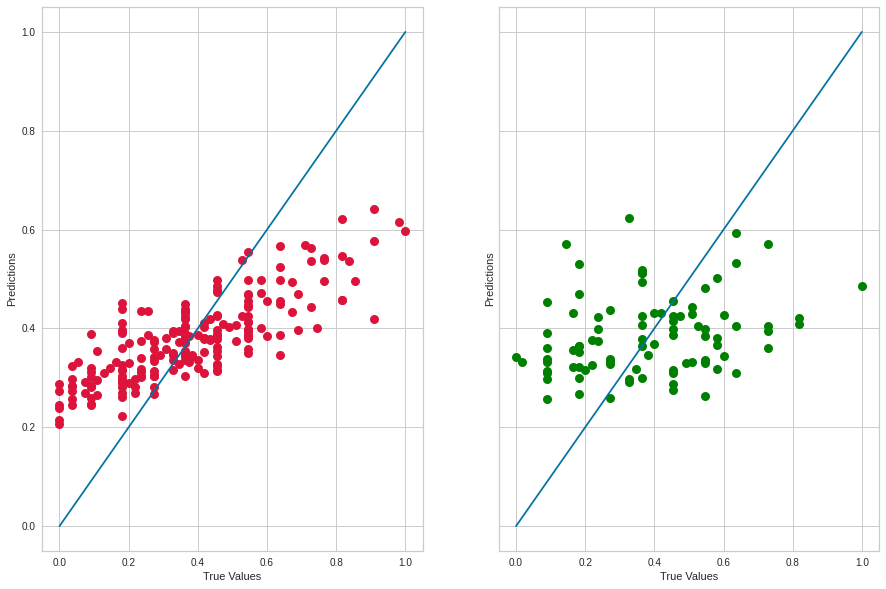

In [ ]:
labels = ['train evaluation', 'test evaluation']
colors = ['crimson', 'green']
data = [[y_train, y_tr_pr], [y_test, y_pred]]
lw = 2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex=True,sharey=True)
for ix, temp in enumerate(labels):
    print(ix)
    axes[ix].scatter(
    data[ix][0], data[ix][1],
    color=colors[ix],
    lw=lw,
    label="{} model".format(labels[ix]),
    )
    axes[ix].set_xlabel('True Values')
    axes[ix].set_ylabel('Predictions')



    p1 = max(max(data[ix][0]), max(data[ix][1]))
    p2 = min(min(data[ix][0]), min(data[ix][1]))    
    axes[ix].plot([p1, p2], [p1, p2], 
                  'b-',
                  label ="{} model".format(labels[ix]))
    #plt.axis('equal')


Compare evaluation of test with the best fit

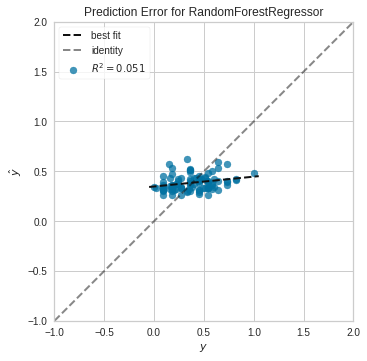

In [ ]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(rf_best)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

In [ ]:
r2_score(y_test, y_pred)

0.0511317161691921

##### Adjusted $R^2$

In [ ]:
#display adjusted R-squared

r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]
p = X_test.shape[1]

adj_r2 = 1- ((1-r2) * ((n-1) / (n-p-1)))

ADJ_R2['Random Forest'] = adj_r2 

## Conclusion

List of all models

In [ ]:
# Basic syntax:
best_model = max(ADJ_R2, key=ADJ_R2.get)

# Note, to get the max value itself, you can do either of the following:
max_r2 = max(ADJ_R2.values())

print(max_r2)
print(best_model)

-0.07183528802207584
Decision Tree


We conclude here that Random Forest is the best model among the following models:

In [ ]:
ADJ_R2.keys()

dict_keys(['SVM', 'KNN', 'Decision Tree', 'Random Forest'])

In [ ]:
ADJ_R2

{'Decision Tree': -0.07183528802207584,
 'KNN': -0.11376505462053954,
 'Random Forest': -0.08268304180694752,
 'SVM': -0.1447259948220494}

### Prediction

In [ ]:
rf_best.fit(X_train, y_train)

y_pred = rf_best.predict(X_t)



In [ ]:
X_t

array([[  0., 383.,   0., ...,   1.,   0.,  99.],
       [  0., 714.,   0., ...,   1.,   1.,  67.],
       [  1., 102.,   0., ...,   1.,   1., 187.],
       ...,
       [  1., 571.,   1., ...,   0.,   0., 159.],
       [  1.,  45.,   1., ...,   1.,   1., 136.],
       [  1.,  94.,   0., ...,   0.,   0., 192.]])

Predictions for the provided test data

In [ ]:
#Invert the standardization:

y_pred_invert = transformer_y.inverse_transform(y_pred.reshape(-1, 1))
y_pred_invert

array([[64.88979166],
       [64.81979793],
       [65.81378863],
       [63.96945352],
       [66.24224613],
       [66.24224613],
       [64.88979166],
       [65.21743002],
       [64.74044268],
       [65.50939454],
       [66.50820049],
       [63.84107122],
       [63.84107122],
       [65.21743002],
       [64.47531581],
       [66.24695935],
       [66.50820049],
       [64.47531581],
       [65.37468427],
       [63.84107122],
       [64.88979166],
       [64.88979166],
       [66.24695935],
       [66.24695935],
       [63.96784191],
       [64.32300334],
       [64.04935268],
       [65.12344604],
       [64.74044268],
       [63.54070406],
       [66.24695935],
       [63.54070406],
       [66.24224613],
       [64.87445834],
       [64.88979166],
       [65.81378863],
       [64.88979166],
       [65.50939454],
       [64.87445834],
       [63.11900812],
       [65.37468427],
       [64.81979793],
       [65.94574232],
       [64.23888929],
       [64.47531581],
       [64